# Import needed Python Libraries and packages 


In [167]:
from sklearn.model_selection import train_test_split 
from sklearn import svm
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

# Explore Our Dataset
## extract dataset as pandas dataframe from a csv file (artificial dataset):

In [168]:
cols_list = ['temperature', 'toux', 'rythme respiratoire']
symptoms = pd.read_csv ('dataset.csv', usecols=cols_list)
results = pd.read_csv ('dataset.csv', usecols=['target'])
print(symptoms.head()) 

   temperature  toux  rythme respiratoire
0    38.909697     0            25.622143
1    38.501598     0            27.080123
2    36.262807     1            21.746695
3    36.432818     0            19.021566
4    39.146504     1            23.887650



**"results"** = Is the feature we are trying to predict (Output). In this case we are trying to predict wheither our "target" is infected by Covid_19 or not . I.e. we are going to use the "target" feature here.  
**"symptoms"** = The predictors which are the remaining columns (temperature, toux, rythme respiratoire)

In [169]:
symptoms.shape

(25000, 3)

As we can see, we have 25000 rows (Instances) and 3 columns (Features)

In [170]:
symptoms.columns

Index(['temperature', 'toux', 'rythme respiratoire'], dtype='object')




Above is the name of each symptoms in our dataframe.


## Visualize our data 


In [171]:
data=symptoms.copy()
data[['target']] = results[['target']]

In [172]:
symptoms.columns

Index(['temperature', 'toux', 'rythme respiratoire'], dtype='object')

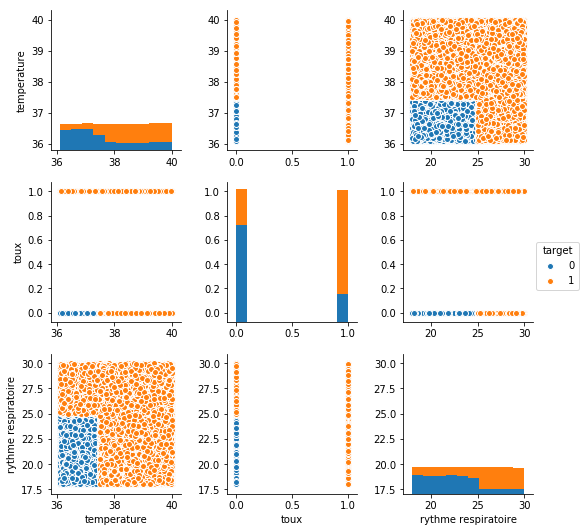

In [173]:
sns.pairplot(data, hue = 'target', vars = ['temperature', 'toux', 'rythme respiratoire'])

The above plots shows the relationship between our features.

**Note :**

1.0 (Orange) = tested positive (Covid_19)

0.0 (Blue) = Tested negative (No Covid_19)

## how many tested positive and tested negative in our dataset :

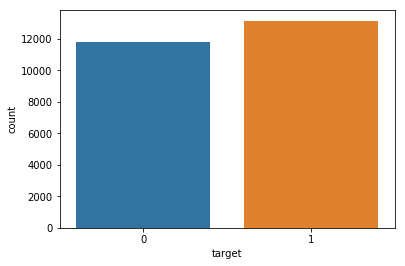

In [174]:
sns.countplot(data['target'], label = "Count")

# Model training :
## splitting dataset , 80% for training and 20% for test
* Training data = Is the subset of our data used to train our model.  
* Testing data = Is the subset of our data that the model hasn't seen before. This is used to test the performance of our model.

In [175]:
X_train, X_test, y_train, y_test = train_test_split(symptoms.values.tolist(), results.values.tolist(), test_size=0.2,random_state=20) 

## Improving our Model
we will try is by Normalizing our data  
Data Normalization is a feature scaling process that brings all values into range [0,1]  
X' = (X-X_min) / (X_max - X_min)-----> X_range   

### normalisation train dataset values :

In [177]:
X_train_range = pd.DataFrame(X_train).max() - pd.DataFrame(X_train).min()
X_train_range.head()
X_train_scaled = (pd.DataFrame(X_train) - pd.DataFrame(X_train).min())/(X_train_range)
X_train_scaled.head()

,0,1,2
0,0.252834,0.0,0.452785
1,0.365551,1.0,0.719840
2,0.975454,1.0,0.491346
3,0.133140,1.0,0.847429
4,0.368953,1.0,0.570953


# Create a svm Classifier


In [203]:
clf = svm.SVC(kernel="rbf",gamma='auto') # rbf Kernel

## train SVM model with the "training" dataset.

In [204]:
type(clf.gamma)

str

In [205]:
#Train the model using the training sets
y_train = np.ravel(y_train)

clf.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

 ### normalisation test dataset values :

In [206]:
X_test_range = (pd.DataFrame(X_test) - pd.DataFrame(X_test).min()).max()
X_test_range.head()
X_test_scaled = (pd.DataFrame(X_test) - pd.DataFrame(X_test).min())/(X_test_range)
X_test_scaled.head()

,0,1,2
0,0.524939,1.0,0.265805
1,0.935205,0.0,0.045115
2,0.194249,1.0,0.997728
3,0.756674,1.0,0.817467
4,0.619889,1.0,0.799443


# Use the trained model to make a prediction using testing data


In [207]:

#Predict the response for test dataset\
y_pred = clf.predict(X_test_scaled)

In [198]:
X_test_scaled.head()

,0,1,2
0,0.524939,1.0,0.265805
1,0.935205,0.0,0.045115
2,0.194249,1.0,0.997728
3,0.756674,1.0,0.817467
4,0.619889,1.0,0.799443


we will check the accuracy of our prediction by comparing it to the output we already have (y_test). We are going to use confusion matrix for this comparison

In [199]:
#accuracy value :
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9514


# The confusion matrix
A confusion matrix for a binary classification task:



| | PredictedNegative | PredictedPositive |
| --- | --- | --- |
| Actual Negative | True Negative(TN) | False Positive (FP) |
| Actual Positive | False Negative (FN) | True Positive (TP) |
In a binary classifier, the "true" class is typically labeled with 1 and the "false" class is labeled with 0.
* **True Positive:** A positive class observation (1) is correctly classified as positive by the model.
* **False Positive:** A negative class observation (0) is incorrectly classified as positive.
* **True Negative:** A negative class observation is correctly classified as negative.
* **False Negative:** A positive class observation is incorrectly classified as negative.

Columns of the confusion matrix sum to the predictions by class. Rows of the matrix sum to the actual values within each class. You may encounter confusion matrices where the actual is in columns and the predicted is in the rows: the meaning is the same but the table will be reoriented.
 
**_Note:_** Remembering what the cells in the confusion matrix represents can be a little tricky. The first word (True or False) indicates whether or not the model was correct. The second word (Positive or Negative) indicates the model's guess (not the actual label


In [162]:
from sklearn.metrics import classification_report, confusion_matrix
from pandas import DataFrame
import matplotlib.pyplot as plt
from seaborn import heatmap

Let's create a confusion matrix for our classfier's performance on the test dataset.

In [163]:
#confusion matrix :
y_test = np.array(y_test)
cm =np.array(confusion_matrix(y_test, y_pred, labels =[1,0]))
confusion = pd.DataFrame(cm, index=['tested positive', 'tested negative'], columns=['predicted positive','predicted negative'])
confusion 

,predicted positive,predicted negative
tested positive,2187,453
tested negative,418,1942


In [164]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.81      0.82      0.82      2360
          1       0.84      0.83      0.83      2640

avg / total       0.83      0.83      0.83      5000



### testing one row :

In [166]:
temperature=40; toux=0; rythme_respiratoire=30

y_pred = clf.predict([[temperature,toux,rythme_respiratoire],])
print(y_pred)

[1]
